Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code to be decoupled from our model training code for better readability and modularity. PyTorch provides two data primitives: torch.utils.data.DataLoader and torch.utils.data.Dataset that allow you to use pre-loaded datasets as well as your own data. 
- `Dataset` stores the samples and their corresponding labels, and 
- `DataLoader` wraps an iterable around the Dataset to enable easy access to the samples.

PyTorch domain libraries provide a number of pre-loaded datasets (such as FashionMNIST) that subclass torch.utils.data.Dataset and implement functions specific to the particular data. They can be used to prototype and benchmark your model. You can find them here: Image Datasets, Text Datasets, and Audio Datasets

# Loading dataset

In [32]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

# Iterate data

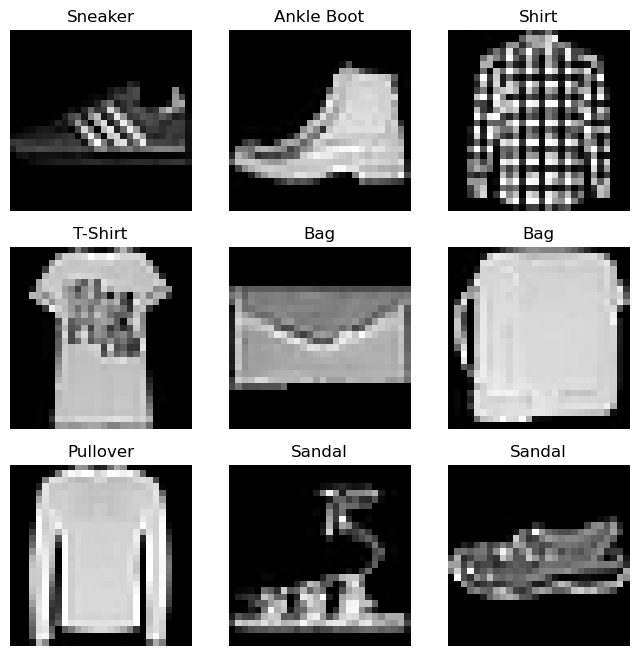

In [33]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# Creating a Custom Dataset for your files

In [34]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [72]:

class AnimalCrossingDataset(Dataset):
    def __init__(self, file_path, transform=None, target_transform=None):
        self.data = pd.read_csv(file_path)
        self.X = torch.from_numpy(self.data.to_numpy())[:, :-1]
        self.y = torch.from_numpy(self.data.to_numpy())[:, -1]
        self.transform = transform
        self.target_transform = target_transform

        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [73]:
my_dataset = AnimalCrossingDataset("./dataset.csv")
vars(my_dataset)

{'data':        28395  610.291  208.178116708527  173.888747041636  1.19719142411602  \
 0      28734  638.018        200.524796        182.734419          1.097356   
 1      29380  624.110        212.826130        175.931143          1.209713   
 2      30008  645.884        210.557999        182.516516          1.153638   
 3      30140  620.134        201.847882        190.279279          1.060798   
 4      30279  634.927        212.560556        181.510182          1.171067   
 ...      ...      ...               ...               ...               ...   
 13605  42097  759.696        288.721612        185.944705          1.552728   
 13606  42101  757.499        281.576392        190.713136          1.476439   
 13607  42139  759.321        281.539928        191.187979          1.472582   
 13608  42147  763.779        283.382636        190.275731          1.489326   
 13609  42159  772.237        295.142741        182.204716          1.619841   
 
        0.549812187138347  287

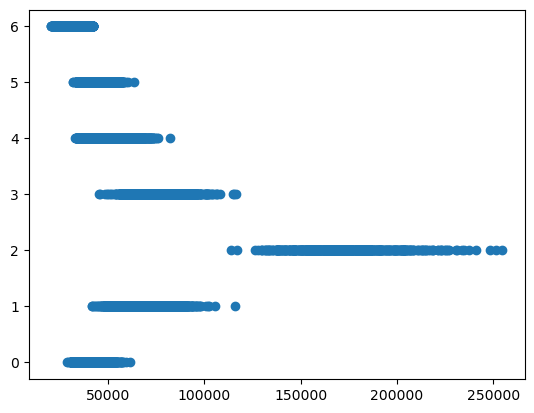

In [74]:
plt.scatter(my_dataset.X[:,0], my_dataset.y)
plt.show()

# Preparing your data for training with `DataLoaders`

In [75]:
from torch.utils.data import DataLoader, random_split

In [76]:
# Split into train and test
generator1 = torch.Generator().manual_seed(42)
train_size = int((1 - 0.1) * len(my_dataset))
test_size = len(my_dataset) - train_size
train_dataset, test_dataset = random_split(my_dataset, [train_size, test_size], generator=generator1)

In [77]:
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [79]:
print(len(train_dataloader))
for batch_idx, (x, y) in enumerate(train_dataloader):
    print(batch_idx)
    print(x.shape)
    print(y.shape)
    break

192
0
torch.Size([64, 16])
torch.Size([64])
